In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# Time: 4 seconds
df_inmuebles = pd.read_csv('Data/inmuebles_full.csv')

## Primeros Filtros

In [14]:
# Create the geometry of the point - from longitud and latitud columns
df_inmuebles['geometry'] = gpd.points_from_xy(x=df_inmuebles['longitud'], y=df_inmuebles['latitud'])

# Create a new variable precio por m2
df_inmuebles['precio_m2'] = df_inmuebles['precio'] / df_inmuebles['area']

# Make it a GeoDataFrame
df_inmuebles = gpd.GeoDataFrame(df_inmuebles, geometry='geometry')

# Filtrar filas sin habitaciones, al ser una de las variables claves no se analizan posibles imputaciones para no dañar la muestra
df_inmuebles = df_inmuebles[~df_inmuebles['habitaciones'].isna()]

# Habitaciones como entero
df_inmuebles['habitaciones'] = df_inmuebles['habitaciones'].astype('int64')

# Solo negocios de venta
df_inmuebles = df_inmuebles[df_inmuebles['tiponegocio'] == 'venta']

# Drop useless columns
df_inmuebles.drop(['latitud', 'longitud', 'fecha_creacion', 'direccion', 'tiponegocio'], axis=1, inplace=True)

In [15]:
df_inmuebles

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
0,3669162,VALLE DEL CAUCA,CALI,3,2,81.0,2.640000e+08,0,1,12,apartamento,POINT (-76.49500 3.36400),3.259259e+06
1,3067524,ANTIOQUIA,SABANETA,2,3,90.0,4.600000e+08,1,2,4,apartamento,POINT (-75.60200 6.14300),5.111111e+06
2,3944108,CUNDINAMARCA,CAJICÁ,3,4,140.0,1.000000e+09,0,4,4,casa,POINT (-74.04343 4.89866),7.142857e+06
4,741346,CUNDINAMARCA,SOPÓ,4,5,750.0,3.300000e+09,0,6,12,casa,POINT (-73.98262 4.93952),4.400000e+06
5,1556370,CUNDINAMARCA,ZIPAQUIRÁ,3,3,86.0,2.700000e+08,0,1,4,casa,POINT (-73.97115 5.01248),3.139535e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882881,1033723,CASANARE,YOPAL,2,2,37.0,1.400000e+08,0,1,4,casa,POINT (-72.41278 5.31848),3.783784e+06
882882,133765,CASANARE,YOPAL,7,3,520.0,5.000000e+08,0,1,12,casa,POINT (-72.41586 5.30054),9.615385e+05
882884,1599348,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,2,2,65.0,4.650000e+08,1,1,12,apartamento,POINT (-81.68981 12.58286),7.153846e+06
882885,2215580,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,1,1,68.0,6.900000e+08,1,1,12,apartamento,POINT (-81.70600 12.57300),1.014706e+07


In [16]:
df_inmuebles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 634414 entries, 0 to 882887
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               634414 non-null  int64   
 1   departamento     634414 non-null  object  
 2   municipio        634414 non-null  object  
 3   habitaciones     634414 non-null  int64   
 4   banos            634414 non-null  int64   
 5   area             634414 non-null  float64 
 6   precio           634414 non-null  float64 
 7   num_ascensores   634414 non-null  int64   
 8   garajes          634414 non-null  int64   
 9   anos_antiguedad  634414 non-null  int64   
 10  tipo_inmueble    634414 non-null  object  
 11  geometry         634414 non-null  geometry
 12  precio_m2        634414 non-null  float64 
dtypes: float64(3), geometry(1), int64(6), object(3)
memory usage: 67.8+ MB


## Departamento

In [17]:
df_inmuebles['departamento'].unique()

array(['VALLE DEL CAUCA', 'ANTIOQUIA', 'CUNDINAMARCA', 'META',
       'RISARALDA', 'TOLIMA', 'BOGOTÁ, D.C.', 'BOLÍVAR', 'ATLÁNTICO',
       'VAUPÉS', 'CAUCA', 'SANTANDER', 'MAGDALENA', 'CALDAS', 'CASANARE',
       'CAQUETÁ', 'QUINDIO', 'NORTE DE SANTANDER', 'BOYACÁ', 'NARIÑO',
       'HUILA', 'ARAUCA', 'LA GUAJIRA', 'CESAR', 'SUCRE', 'CÓRDOBA',
       'CHOCÓ',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
       'AMAZONAS', 'VICHADA', 'GUAINÍA', 'PUTUMAYO', 'GUAVIARE'],
      dtype=object)

## Municipio

In [18]:
len(df_inmuebles['municipio'].unique())

599

## Habitaciones

In [19]:
df_inmuebles.groupby(['habitaciones']).agg(count=('id', 'count'))

,count
habitaciones,
0,646
1,27058
2,109165
3,358119
4,95902
5,23486
6,9058
7,4252
8,2948


<Axes: >

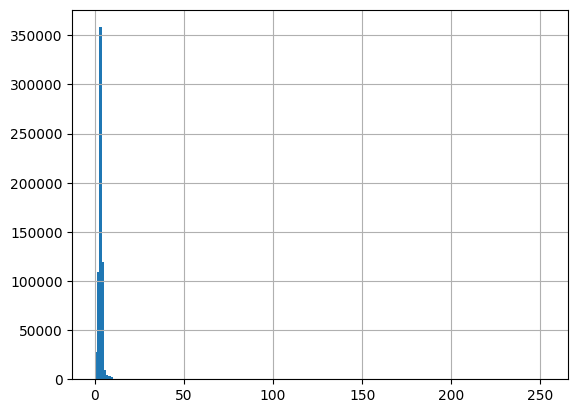

In [20]:
df_inmuebles['habitaciones'].hist(bins=200)

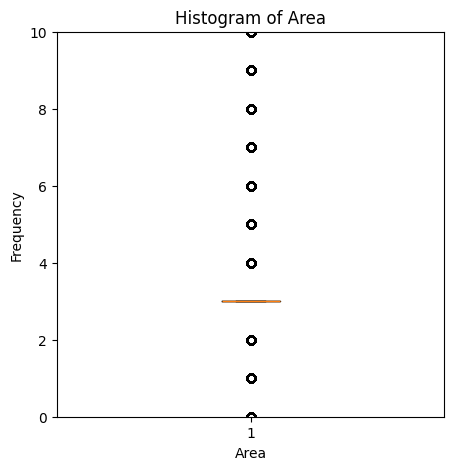

In [21]:
# Create a histogram of the 'area' column
plt.figure(figsize=(5, 5))
plt.boxplot(df_inmuebles['habitaciones'])

# Set the x-axis limits
# plt.xlim(0, 1000)  # Set xlim to desired values
plt.ylim(0, 10)
# plt.ylim(0, 50)

# Add titles and labels
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [22]:
Q1 = df_inmuebles['habitaciones'].quantile(0.25)
Q2 = df_inmuebles['habitaciones'].quantile(0.50)
Q3 = df_inmuebles['habitaciones'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 3.0
Median (50th percentile): 3.0
Q3 (75th percentile): 3.0
IQR (Interquartile Range): 0.0
Lower Whisker: 3.0
Upper Whisker: 3.0


In [23]:
# Filtrar las filas con 0 habitaciones y más de 10 habitaciones
df_inmuebles = df_inmuebles[(df_inmuebles['habitaciones'] >= 1) & ((df_inmuebles['habitaciones'] <= 10))]

<Axes: >

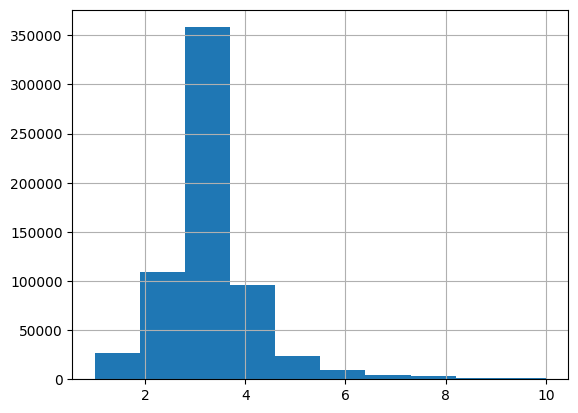

In [24]:
df_inmuebles['habitaciones'].hist()

## Baños

In [25]:
df_inmuebles.groupby(['banos']).agg(count=('id', 'count'))

,count
banos,
1,38276
2,290999
3,166306
4,92440
5,44724


## Área

<Axes: >

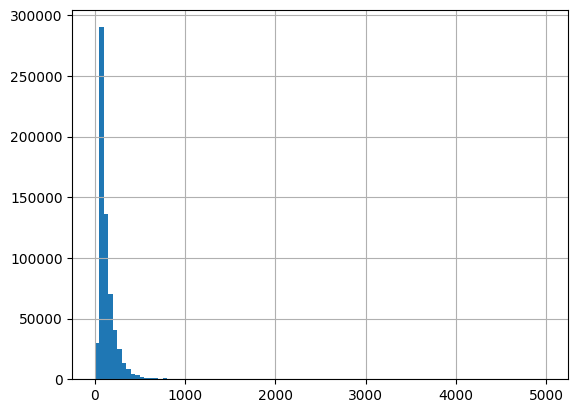

In [26]:
df_inmuebles['area'].hist(bins=100)

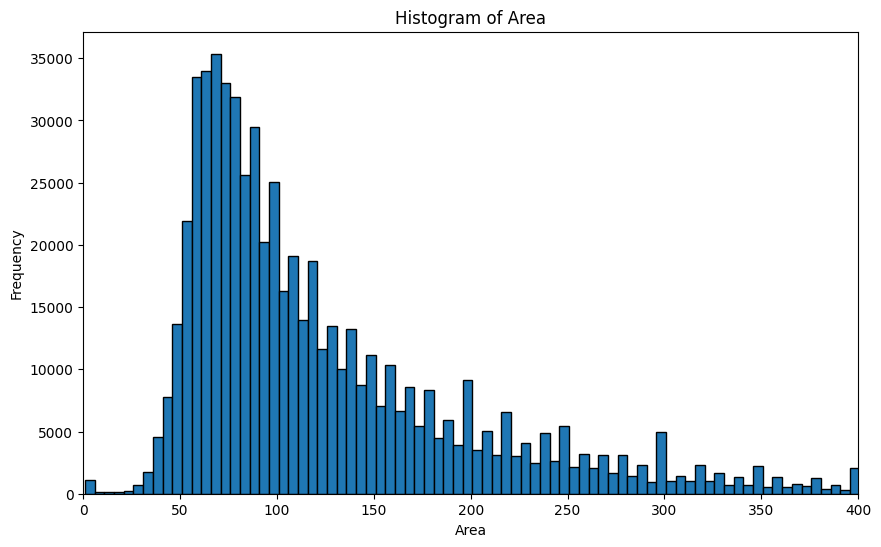

In [27]:
# Create a histogram of the 'area' column
plt.figure(figsize=(10, 6))
plt.hist(df_inmuebles['area'], bins=1000, edgecolor='black')

# Set the x-axis limits
plt.xlim(0, 400)  # Set xlim to desired values

# Add titles and labels
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [28]:
Q1 = df_inmuebles['area'].quantile(0.25)
Q2 = df_inmuebles['area'].quantile(0.50)
Q3 = df_inmuebles['area'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 71.0
Median (50th percentile): 100.0
Q3 (75th percentile): 161.0
IQR (Interquartile Range): 90.0
Lower Whisker: -64.0
Upper Whisker: 296.0


In [29]:
# Filtrar los inmuebles con menos de 20 m2 de area y con más de 296 m2 (+ 1.5 * IQR)
df_inmuebles = df_inmuebles[(df_inmuebles['area'] >= 20) & (df_inmuebles['area'] <= upper_whisker)]

## Ascensores

In [30]:
df_inmuebles.groupby(['num_ascensores']).agg(count=('id', 'count'))

,count
num_ascensores,
0,287925
1,298391


## Garajes

In [31]:
df_inmuebles.groupby(['garajes']).agg(count=('id', 'count'))

,count
garajes,
1,361550
2,184005
3,27423
4,10451
5,1427
6,942
7,110
8,215
9,27


<Axes: >

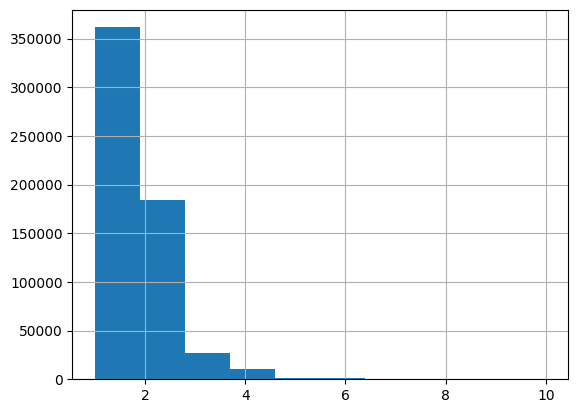

In [32]:
df_inmuebles['garajes'].hist(bins=10)

In [33]:
Q1 = df_inmuebles['garajes'].quantile(0.25)
Q2 = df_inmuebles['garajes'].quantile(0.50)
Q3 = df_inmuebles['garajes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 1.0
Median (50th percentile): 1.0
Q3 (75th percentile): 2.0
IQR (Interquartile Range): 1.0
Lower Whisker: -0.5
Upper Whisker: 3.5


In [34]:
df_inmuebles = df_inmuebles[(df_inmuebles['garajes'] >= 0) & (df_inmuebles['garajes'] <= 4)]

## Años Antigüedad

In [68]:
df_inmuebles['anos_antiguedad'].unique()

array([12,  4, 30, 23,  1], dtype=int64)

In [69]:
df_inmuebles.groupby(['anos_antiguedad']).agg(count=('id', 'count'))

,count
anos_antiguedad,
1,34448
4,211308
12,122795
23,129492
30,45682


## Tipo Inmueble

In [36]:
df_inmuebles.groupby(['tipo_inmueble']).agg(count=('id', 'count'))

,count
tipo_inmueble,
apartamento,450325
casa,133104


## Precio

<Axes: >

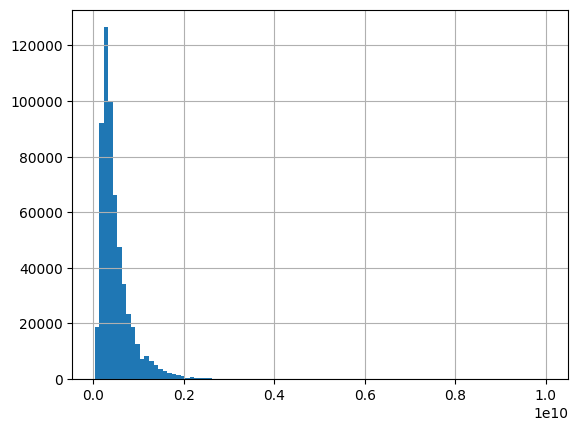

In [37]:
df_inmuebles['precio'].hist(bins=100)

In [49]:
Q1 = df_inmuebles['precio'].quantile(0.25)
Q2 = df_inmuebles['precio'].quantile(0.50)
Q3 = df_inmuebles['precio'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 263000000.0
Median (50th percentile): 382000000.0
Q3 (75th percentile): 600000000.0
IQR (Interquartile Range): 337000000.0
Lower Whisker: -242500000.0
Upper Whisker: 1105500000.0


In [38]:
df_inmuebles.sort_values(by='precio', ascending=False)

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
535537,4582558,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,2,55.0,1.000000e+10,0,1,23,casa,POINT (-74.16308 4.62431),1.818182e+08
180267,3008231,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
439851,3098995,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
76268,3375647,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
751214,3928060,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2,3,99.0,9.950000e+09,0,2,4,apartamento,POINT (-74.05302 4.67308),1.005051e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583058,396798,ANTIOQUIA,SABANETA,3,2,50.0,4.000000e+07,0,1,4,apartamento,POINT (-75.60659 6.15441),8.000000e+05
352802,1348684,HUILA,NEIVA,3,1,100.0,4.000000e+07,0,1,23,casa,POINT (-75.25076 2.95211),4.000000e+05
92581,2218402,CUNDINAMARCA,SOACHA,3,1,50.0,4.000000e+07,0,1,4,apartamento,POINT (-74.21539 4.60206),8.000000e+05
261576,1004710,TOLIMA,PRADO,2,1,72.0,4.000000e+07,0,1,12,casa,POINT (-74.92272 3.75271),5.555556e+05


In [52]:
df_inmuebles = df_inmuebles[(df_inmuebles['precio'] <= upper_whisker)]

<Axes: >

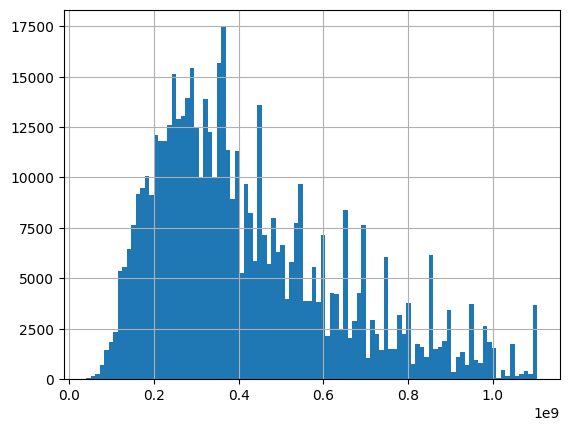

In [53]:
df_inmuebles['precio'].hist(bins=100)

## Precio por M2

In [57]:
Q1 = df_inmuebles['precio_m2'].quantile(0.25)
Q2 = df_inmuebles['precio_m2'].quantile(0.50)
Q3 = df_inmuebles['precio_m2'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1 (25th percentile): 3017543.8596491227
Median (50th percentile): 4000000.0
Q3 (75th percentile): 5083333.333333333
IQR (Interquartile Range): 2065789.4736842103
Lower Whisker: -81140.3508771928
Upper Whisker: 8182017.5438596485


<Axes: >

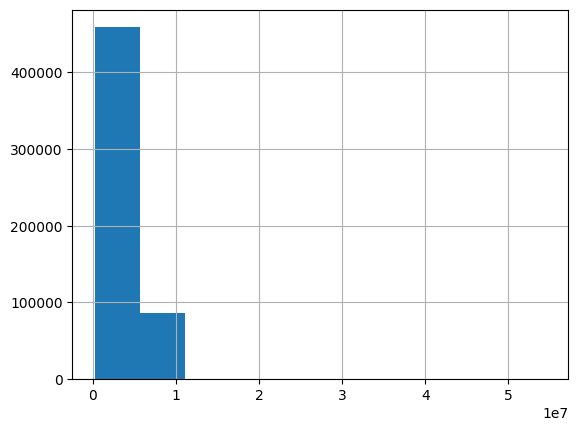

In [56]:
df_inmuebles['precio_m2'].hist()

In [54]:
df_inmuebles.sort_values(by='precio_m2', ascending=False)

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
552868,3407922,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
708569,3119497,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
345311,4386013,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
812298,3959376,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
137798,2801675,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3,4,20.0,1.090000e+09,0,2,23,casa,POINT (-74.05800 4.69800),5.450000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768892,561773,META,PUERTO LÓPEZ,4,3,251.0,6.666667e+07,0,1,4,casa,POINT (-72.95595 4.09059),2.656042e+05
415780,656308,CAUCA,PÁEZ,3,2,266.0,7.000000e+07,0,2,4,casa,POINT (-75.91174 2.67459),2.631579e+05
618318,1366238,TOLIMA,LÉRIDA,2,1,200.0,5.000000e+07,0,1,23,casa,POINT (-74.91355 4.85243),2.500000e+05
255461,750821,TOLIMA,LÉRIDA,3,1,200.0,5.000000e+07,0,1,23,casa,POINT (-74.91367 4.85227),2.500000e+05


In [62]:
df_inmuebles= df_inmuebles[df_inmuebles['precio_m2'] <= 10e6]

<Axes: >

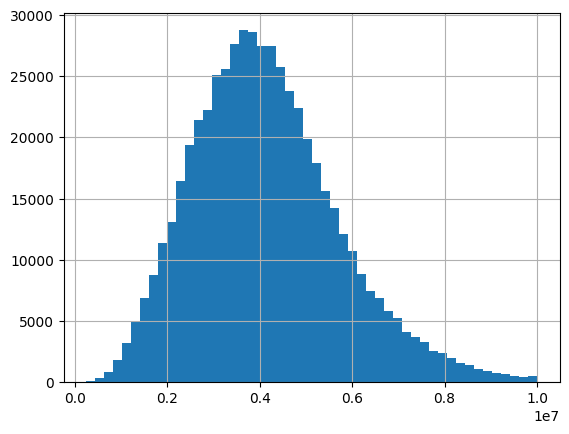

In [67]:
df_inmuebles['precio_m2'].hist(bins=50)

In [64]:
df_inmuebles.head()

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
0,3669162,VALLE DEL CAUCA,CALI,3,2,81.0,2.640000e+08,0,1,12,apartamento,POINT (-76.49500 3.36400),3.259259e+06
1,3067524,ANTIOQUIA,SABANETA,2,3,90.0,4.600000e+08,1,2,4,apartamento,POINT (-75.60200 6.14300),5.111111e+06
2,3944108,CUNDINAMARCA,CAJICÁ,3,4,140.0,1.000000e+09,0,4,4,casa,POINT (-74.04343 4.89866),7.142857e+06
5,1556370,CUNDINAMARCA,ZIPAQUIRÁ,3,3,86.0,2.700000e+08,0,1,4,casa,POINT (-73.97115 5.01248),3.139535e+06
6,3732824,CUNDINAMARCA,CAJICÁ,3,4,196.0,8.300000e+08,0,4,4,casa,POINT (-74.03600 4.92500),4.234694e+06


In [65]:
df_inmuebles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 543725 entries, 0 to 882887
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               543725 non-null  int64   
 1   departamento     543725 non-null  object  
 2   municipio        543725 non-null  object  
 3   habitaciones     543725 non-null  int64   
 4   banos            543725 non-null  int64   
 5   area             543725 non-null  float64 
 6   precio           543725 non-null  float64 
 7   num_ascensores   543725 non-null  int64   
 8   garajes          543725 non-null  int64   
 9   anos_antiguedad  543725 non-null  int64   
 10  tipo_inmueble    543725 non-null  object  
 11  geometry         543725 non-null  geometry
 12  precio_m2        543725 non-null  float64 
dtypes: float64(3), geometry(1), int64(6), object(3)
memory usage: 58.1+ MB


## Transformación Final

In [70]:
# Time: 4 seconds
df_inmuebles = pd.read_csv('Data/inmuebles_full.csv')

In [71]:
# Create the geometry of the point - from longitud and latitud columns
df_inmuebles['geometry'] = gpd.points_from_xy(x=df_inmuebles['longitud'], y=df_inmuebles['latitud'])

# Create a new variable precio por m2
df_inmuebles['precio_m2'] = df_inmuebles['precio'] / df_inmuebles['area']

# Make it a GeoDataFrame
df_inmuebles = gpd.GeoDataFrame(df_inmuebles, geometry='geometry')

# Filtrar filas sin habitaciones, al ser una de las variables claves no se analizan posibles imputaciones para no dañar la muestra
df_inmuebles = df_inmuebles[~df_inmuebles['habitaciones'].isna()]

# Habitaciones como entero
df_inmuebles['habitaciones'] = df_inmuebles['habitaciones'].astype('int64')

# Solo negocios de venta
df_inmuebles = df_inmuebles[df_inmuebles['tiponegocio'] == 'venta']

# Drop useless columns
df_inmuebles.drop(['latitud', 'longitud', 'fecha_creacion', 'direccion', 'tiponegocio'], axis=1, inplace=True)

# Filtrar las filas con 0 habitaciones y más de 10 habitaciones
df_inmuebles = df_inmuebles[(df_inmuebles['habitaciones'] >= 1) & ((df_inmuebles['habitaciones'] <= 10))]

# IQR Area
Q1 = df_inmuebles['area'].quantile(0.25)
Q2 = df_inmuebles['area'].quantile(0.50)
Q3 = df_inmuebles['area'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Filtrar los inmuebles con menos de 20 m2 de area y con más de 296 m2 (+ 1.5 * IQR)
df_inmuebles = df_inmuebles[(df_inmuebles['area'] >= 20) & (df_inmuebles['area'] <= upper_whisker)]

# Filtrar los inmuebles con más de 4 garajes
df_inmuebles = df_inmuebles[(df_inmuebles['garajes'] >= 0) & (df_inmuebles['garajes'] <= 4)]

# IQR Precio
Q1 = df_inmuebles['precio'].quantile(0.25)
Q2 = df_inmuebles['precio'].quantile(0.50)
Q3 = df_inmuebles['precio'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Filtrar los inmuebles con precio superior fuera del upper whisker
df_inmuebles = df_inmuebles[(df_inmuebles['precio'] <= upper_whisker)]

# Filtrar los inmuebles con precio m2 superior 10 millones
df_inmuebles= df_inmuebles[df_inmuebles['precio_m2'] <= 10e6]

In [74]:
df_inmuebles.head()

,id,departamento,municipio,habitaciones,banos,area,precio,num_ascensores,garajes,anos_antiguedad,tipo_inmueble,geometry,precio_m2
0,3669162,VALLE DEL CAUCA,CALI,3,2,81.0,2.640000e+08,0,1,12,apartamento,POINT (-76.49500 3.36400),3.259259e+06
1,3067524,ANTIOQUIA,SABANETA,2,3,90.0,4.600000e+08,1,2,4,apartamento,POINT (-75.60200 6.14300),5.111111e+06
2,3944108,CUNDINAMARCA,CAJICÁ,3,4,140.0,1.000000e+09,0,4,4,casa,POINT (-74.04343 4.89866),7.142857e+06
5,1556370,CUNDINAMARCA,ZIPAQUIRÁ,3,3,86.0,2.700000e+08,0,1,4,casa,POINT (-73.97115 5.01248),3.139535e+06
6,3732824,CUNDINAMARCA,CAJICÁ,3,4,196.0,8.300000e+08,0,4,4,casa,POINT (-74.03600 4.92500),4.234694e+06


In [75]:
df_inmuebles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 543725 entries, 0 to 882887
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   id               543725 non-null  int64   
 1   departamento     543725 non-null  object  
 2   municipio        543725 non-null  object  
 3   habitaciones     543725 non-null  int64   
 4   banos            543725 non-null  int64   
 5   area             543725 non-null  float64 
 6   precio           543725 non-null  float64 
 7   num_ascensores   543725 non-null  int64   
 8   garajes          543725 non-null  int64   
 9   anos_antiguedad  543725 non-null  int64   
 10  tipo_inmueble    543725 non-null  object  
 11  geometry         543725 non-null  geometry
 12  precio_m2        543725 non-null  float64 
dtypes: float64(3), geometry(1), int64(6), object(3)
memory usage: 58.1+ MB
